In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns

In [2]:
# Descargar datos
data = yf.download('BHP', start='2020-01-01', end='2023-12-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,55.894084,56.406545,55.375490,55.936302,50.827592,3.252849e+06
std,8.988175,9.036764,8.952654,9.030858,9.003104,1.755506e+06
min,27.448708,28.483498,26.565565,27.591436,24.029581,6.951320e+05
25%,49.259590,49.734613,48.777876,49.275001,43.825510,2.195674e+06
50%,57.545000,58.067114,57.152702,57.693703,53.218954,2.796951e+06
75%,62.395001,62.900002,61.903062,62.382500,57.692254,3.762441e+06
max,72.720787,73.211418,72.033897,72.256912,67.587662,1.353843e+07


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,49.259590,49.304192,48.867085,48.991970,41.455845,1382193
2020-01-03,48.385368,48.911686,48.349689,48.661907,41.176552,1208438
2020-01-06,48.519180,48.706512,48.501339,48.608383,41.131264,771584
2020-01-07,48.438892,48.795719,48.429974,48.608383,41.131264,1014393
2020-01-08,48.795719,49.063335,48.706512,48.849243,41.335075,1317848


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,68.000000,68.169998,67.669998,67.820000,66.152298,1896800
2023-12-26,68.000000,68.449997,67.959999,68.220001,66.542465,1390200
2023-12-27,68.239998,68.989998,68.230003,68.889999,67.195984,2339200
2023-12-28,68.839996,69.110001,68.580002,68.620003,66.932625,1949500
2023-12-29,68.330002,68.550003,68.010002,68.309998,66.630249,1555200


In [6]:
# Matriz de correlación con todas las variables y visualización
correlation_matrix = data.corr()
correlation_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.998840,0.998844,0.997341,0.974658,-0.135843
High,0.998840,1.000000,0.998768,0.998924,0.975599,-0.125362
Low,0.998844,0.998768,1.000000,0.998779,0.976553,-0.148868
Close,0.997341,0.998924,0.998779,1.000000,0.976628,-0.134759
Adj Close,0.974658,0.975599,0.976553,0.976628,1.000000,-0.149515
Volume,-0.135843,-0.125362,-0.148868,-0.134759,-0.149515,1.000000


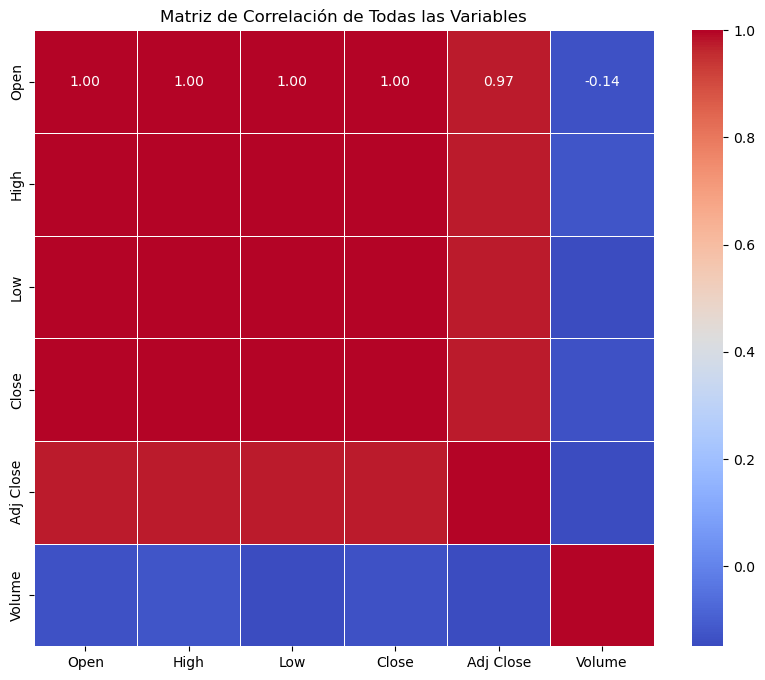

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Todas las Variables')
plt.show()

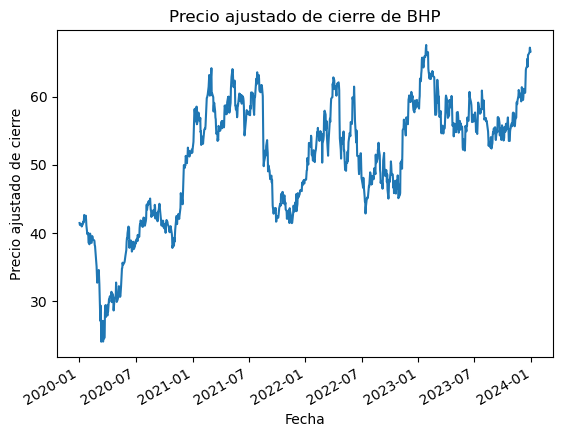

In [10]:
# 1. Gráfico del precio (Closing Price vs Time)
data['Adj Close'].plot(title='Precio ajustado de cierre de BHP')
plt.xlabel('Fecha')
plt.ylabel('Precio ajustado de cierre')
plt.show()

C:\Users\harol\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


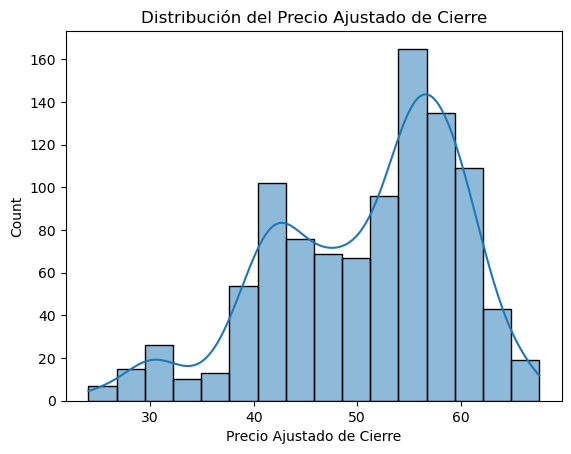

In [11]:
# 2. Visualización de la distribución del precio
sns.histplot(data['Adj Close'], kde=True)
plt.title('Distribución del Precio Ajustado de Cierre')
plt.xlabel('Precio Ajustado de Cierre')
plt.show()

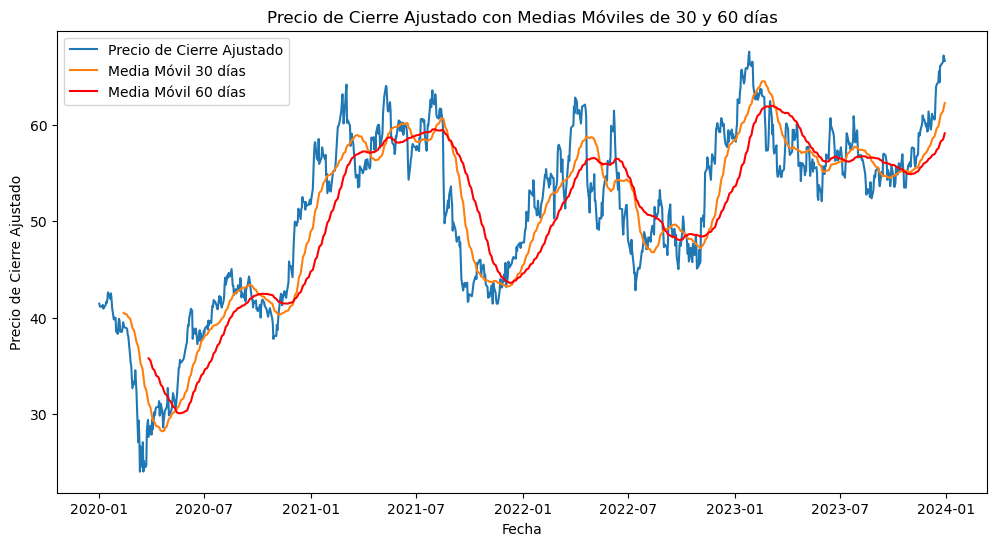

In [12]:
# 3. Gráfico de precio con medias móviles de 30 y 60 días
data['30MA'] = data['Adj Close'].rolling(window=30).mean()
data['60MA'] = data['Adj Close'].rolling(window=60).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Adj Close'], label='Precio de Cierre Ajustado')
plt.plot(data['30MA'], label='Media Móvil 30 días')
plt.plot(data['60MA'], label='Media Móvil 60 días', color='red')
plt.title('Precio de Cierre Ajustado con Medias Móviles de 30 y 60 días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.legend()
plt.show()

In [13]:
# Preparar los datos
data['Lag_1'] = data['Adj Close'].shift(1)
data.dropna(inplace=True)

In [14]:
X = data[['Lag_1']]
y = data['Adj Close']

In [15]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Crear y entrenar el modelo Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Hacer predicciones
y_pred = rf_model.predict(X_test_scaled)

In [19]:
# Crear un DataFrame con los resultados
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred}, index=y_test.index)

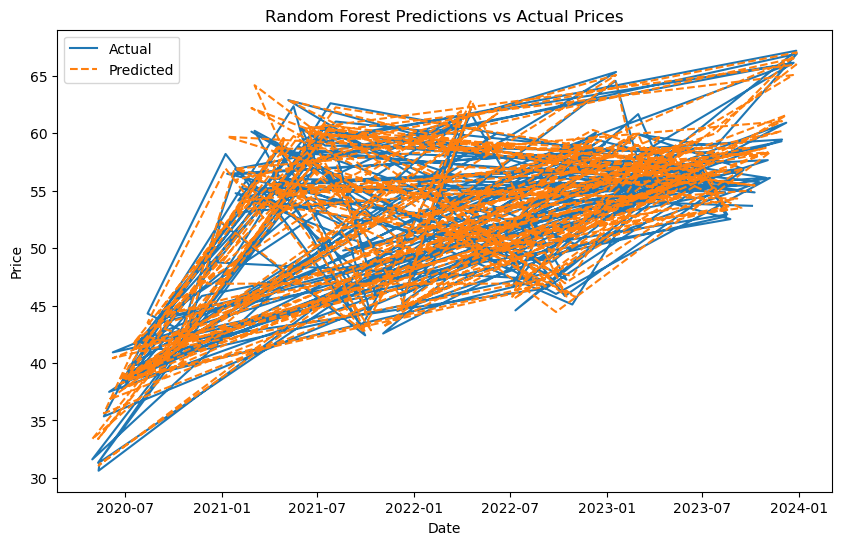

In [20]:
# Ploteo de los resultados
plt.figure(figsize=(10, 6))
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted', linestyle='--')
plt.legend()
plt.title('Random Forest Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [21]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 2.07
Root Mean Squared Error: 1.44
Mean Absolute Error: 1.09


In [22]:
# Predicción para el siguiente día
last_price = scaler.transform([[y.iloc[-1]]])
next_day_prediction = rf_model.predict(last_price)
next_day_prediction = scaler.inverse_transform(next_day_prediction.reshape(-1, 1))
print(f"El precio de BHP se pronóstica según el modelo Random Forest para el siguiente día como: ${next_day_prediction[0][0]:.2f} por acción.")

El precio de BHP se pronóstica según el modelo Random Forest para el siguiente día como: $610.92 por acción.


C:\Users\harol\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
